In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#spec = pd.read_csv('150Hzhpassdata.csv', header=None)
from sklearn.model_selection import train_test_split
#ubuntu
# 特徴量
#X = np.loadtxt("/home/nodoka/18-kitada-bachelor-paper/knn/feature-data/data.csv",delimiter=",")
#X = np.loadtxt("/home/nodoka/18-kitada-bachelor-data/spectrogram/4ms-feature-data/group/150.csv",delimiter=",")
# 目的変数
#Y = np.loadtxt("/home/nodoka/18-kitada-bachelor-paper/knn/feature-data/label.csv",delimiter=",")
#Y = np.loadtxt("/home/nodoka/18-kitada-bachelor-data/spectrogram/4ms-feature-data/group/label.csv",delimiter=",")

#vine linux
# 特徴量
X = np.loadtxt("/home/hera/nodoka/home2/nodoka/18-kitada-bachelor-data/spectrogram/4ms-feature-data/group/all.csv",delimiter=",")
#print(X)
# 目的変数
Y = np.loadtxt("/home/hera/nodoka/home2/nodoka/18-kitada-bachelor-data/spectrogram/4ms-feature-data/group/label.csv",delimiter=",")


# データ表示（特徴量）
print("データ数 = %d  特徴量 = %d" % (X.shape[0], X.shape[1]))


# データ表示（目的変数）
print("データ数 = %d" % (Y.shape[0]))
#print(Y)


from sklearn.neighbors import KNeighborsClassifier

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

#
# K-近傍法
#


list_nn = []
list_score = []
k=3
# KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(X, Y)

print(knc.get_params)
# 予測　
#Y_pred = knc.predict(X_test)




# 評価 R^2
#score = knc.score(X_test, Y_test)
#print("[%d] score: {:.2f}".format(score) % k)

#list_nn.append(k)
#list_score.append(score)

# プロット
#plt.ylim(0.9, 1.0)
#plt.xlabel("n_neighbors")
#plt.ylabel("score")
#plt.plot(list_nn, list_score)

#from sklearn.metrics import confusion_matrix
#confusion_matrix(Y_test,Y_pred)
# = df.iloc[train_size:].copy()
#test_df["pred_label"] = pred_labels
 
#test_df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter")
#plt.title("true label")

データ数 = 3760  特徴量 = 1025
データ数 = 3760
<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')>


In [3]:
#テストデータ
test_data = np.loadtxt("/home2/nodoka/18-kitada-bachelor-data/spectrogram/4ms-test-data/B39-1700-1701-150-nomalize.csv",delimiter=",")
#test_data = np.loadtxt("/home/nodoka/18-kitada-bachelor-data/spectrogram/4ms-feature-data/rippledata/B",delimiter=",")
Y_graph = knc.predict(test_data)
print(Y_graph)

ValueError: query data dimension must match training data dimension

NameError: name 'Y_graph' is not defined

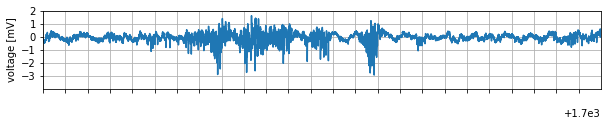

In [2]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import pandas as pd
import sys
import scipy
from swan import pycwt
from scipy import signal
from pylab import *
with open('/home/hera/nodoka/home2/nodoka/txt-data/restrant/B39-HR.pickle', mode='rb') as fp:
#with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)
fs = 25000 #サンプリング周波数
#starttime = 1991.0946
#starttime = 1991.6946
#endtime = 1991.9946
#starttime = 2126.7662
#endtime = 2127.157
#starttime = 2132.3123
#endtime = 2132.5123
starttime = 1700
endtime = 1701
start = int(starttime*fs)
end = int(endtime*fs)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i/fs))])
#print(datatime)

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
plt.subplot(4, 1, 1)
xlim(starttime,endtime)
plt.yticks([-3,-2,-1,0,1,2])
plt.ylim(-4,2)
ylabel("voltage [mV]")
#plt.xticks(color="None")
plt.plot(datatime,df[start:end])
plt.grid(which='major')
#gca().xaxis.set_minor_locator(MultipleLocator(0.04))
leng = np.arange(starttime, endtime, 0.04)
plt.xticks(leng,color="None")
#plt.xaxis.set_minor_locator(dates.DayLocator(interval=0.04))
#gca().xaxis.set_minor_locator(True,0.04)
s = 100

plt.axvspan(100,200,color="red")
for i in range(len(Y_graph)):
    print(Y_graph[i])
    if(Y_graph[i] == 1.0):
        plt.axvspan(((i*s-(s/2))/fs)+starttime ,((i*s+(s/2))/fs)+starttime ,color="blue")
    if(Y_graph[i] == 2.0):
        plt.axvspan(((i*s-(s/2))/fs)+starttime ,((i*s+(s/2))/fs)+starttime ,color="red")
    if(Y_graph[i] == 3.0):
        plt.axvspan(((i*s-(s/2))/fs)+starttime ,((i*s+(s/2))/fs)+starttime ,color="aqua")   
    if(Y_graph[i] == 4.0):
        plt.axvspan(((i*s-(s/2))/fs)+starttime ,((i*s+(s/2))/fs)+starttime ,color="orange")   
    if(Y_graph[i] == 5.0):
        plt.axvspan(((i*s-(s/2))/fs)+starttime ,((i*s+(s/2))/fs)+starttime ,color="mediumorchid")   
      

del datatime
#print(Y_graph)
#print(type(Y_graph))


